Physics 3700 Lab 0
by Dallas Collie

In [1]:
import numpy as np
from scipy.stats import norm

# pulling average temperature data from file
avg_temperature = np.loadtxt("weatherstats_vancouver_daily.csv", delimiter=",", usecols=(3), skiprows=(1))

TASK 1 - Mean

TASK 1a

In [3]:
def mean(lst):
    '''This function will return the mean of a list of numbers'''
    entries = len(lst)          # find how many entries in the list
    total = 0
    for num in lst:            
        total = total + num     # sum every number in the list
    mean = total/entries        # find the mean of the list
    return mean                 # return the mean


TASK 1b

In [4]:
# calculating the mean using the function I created
mean_ave_temp = mean(avg_temperature)

TASK 1c

In [5]:
print ('The mean average temperature using my function is %.3f\xb0C.'%(mean_ave_temp))

The mean average temperature using my function is 10.590°C.


TASK 1d

In [6]:
# mean of the average temperature from file using numpy function
mean_ave_temp_np = np.mean(avg_temperature)
print ('The mean average temperature using a numpy function is %.3f\xb0C.'%(mean_ave_temp_np))

The mean average temperature using a numpy function is 10.590°C.


In [7]:
# compare the means calcuated by my fucnction and the numpy function
round(mean_ave_temp,3) == round(mean_ave_temp_np,3)

True

The function for mean I created matches the function in numpy to 3 decimal places. 

TASK 2 - Standard Deviation

TASK 2a

In [8]:
def std_dev(lst):
    '''This function will return the standard deviation of a list of numbers'''
    entries = len(lst)          # find how many entries in the list
    total = 0
    for num in lst:            
        total = total + num     # sum every number in the list
    mean = total/entries        # find the mean of the list
    sum_squares = 0
    sum_lst = 0
    for item in lst:            
        sum_squares = sum_squares + item**2    # loop to sum the squares of list entries
        sum_lst = sum_lst + item               # loop to sum the list entries
    std = (1/(entries-1)*(sum_squares - sum_lst**2/entries))**.5 # runninig stats std calculation
    return std                  # return the standard deviation

TASK 2b

In [9]:
# calculating the standard deviation of the average temperature data using the function I created
std_ave_temp = std_dev(avg_temperature)


TASK 2c

In [10]:
print ("The average temperature caculated using my function is: %.3f\u00b0C" %std_ave_temp) 

The average temperature caculated using my function is: 5.797°C


TASK 2d

In [11]:
print ("The average temperature caculated using a numpy function is: %.3f\u00b0C" %np.std(avg_temperature))

The average temperature caculated using a numpy function is: 5.797°C


In [12]:
# compare the standard deviations calculated by my function and the numpy function
round(std_ave_temp,3) == round(np.std(avg_temperature),3)

True

The function for standard deviation I created matches the function in NumPy to 3 decimal places.

TASK 3 - Histogram

In [38]:
def histogram(min_range, max_range, num_bins,pmf,lst):
    '''This function creates histogram data: bin locations and bin heights. The parameters include
    the minimum and maximum range of the data needed, the number of bins for the histogram, an option to
    change the data to a probability mass function, and the data list'''
    
    bin_width = (max_range - min_range)/num_bins
    
    # getting locations of bins and save to an array
    num = min_range+(bin_width/2)      # first loaction of bin
    i = 0
    bin_locations = []
    while (i < num_bins):
        bin_locations.append((num))    # put location of bin in an array
        num = num+bin_width            # advance to the next location of bin
        i += 1
    
    # finding all numbers that are in the range and fit them in a bin by making the number a multiple 
    #    of the bin size and excluding others not in range by making them less than 0 
    range_list = [math.floor((item-min_range)/bin_width) if (item >= min_range and item <= max_range) else -item for item in lst]
    j=0
    bin_counts = []
    while (j < num_bins):
        bin_counts.append(range_list.count(j))  # count the number of occurances of the multiples of bin size for each bin
        j += 1
    
    # if the user wants a probability mass funcition of the bin counts
    if (pmf == True):    
        pmf_bin_counts = []
        for x in bin_counts:
            pmf_bin_counts.append(x/sum(bin_counts))  # convertiing bin counts to pmf
        bin_counts = pmf_bin_counts                   # reassigning bin counts to the pmf bin counts
    bin_data = [bin_counts,bin_locations]             # creating a 2D array for the bin data
    
    return bin_data       # return bin data which includes bin counts and locations

In [14]:
import math
import matplotlib.pyplot as plt

In [39]:
# setting range and number of bins
min_range = -10
max_range = 30
num_bins = 30
pmf = False
bin_width = (max_range - min_range)/num_bins

# create histogram data using my histogram function using the above parameters
ave_temp_histogram_data = histogram(min_range,max_range,num_bins,pmf,avg_temperature)

In [40]:
occurances = ave_temp_histogram_data[0]
temperatures = ave_temp_histogram_data[1]

# finding the mean of histogram data
result = []
for i1, i2 in zip(occurances,temperatures):  
    result.append(i1*i2)                       # muliply the two data sets and saving to a new array
mean_hist = sum(result)/sum(occurances)        # calculating the mean of the histogram data sets
print(mean_hist)

# finding the standard deviation of histogram data
result2 = []
for i3, i4 in zip(occurances,temperatures):
    result2.append(i3*(i4-mean_hist)**2)         # finding the deviation from the mean, squaring and multiplying by occurances
std_hist = (sum(result2)/(sum(occurances)))**.5  # calculating the standard deviation of the histogram data sets
print(std_hist)


10.598926559322598
5.805700658018811


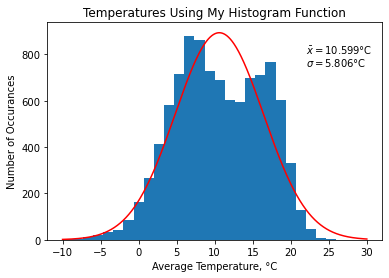

In [42]:
bin_height = occurances
bin_location = temperatures

fig = plt.figure()
x_axis = np.arange(-10, 30, 0.01)
plt.bar(bin_location,bin_height,bin_width)   
plt.plot(x_axis, (norm.pdf(x_axis,mean_hist,std_hist))*13000, "r-")
plt.text(22, 800, r'$\bar{x}=$%.3f' u'\xb0C' % (mean_hist)) 
plt.text(22, 750, r'$\sigma=$%.3f'u'\xb0C' % (std_hist))
plt.title('Temperatures Using My Histogram Function')
plt.ylabel('Number of Occurances')
plt.xlabel('Average Temperature, \xb0C')
plt.savefig("YVR_Ave_Temp_Histo.pdf", dpi=150)
plt.show()

In [16]:
# create histogram data using NumPy and the same min and max range and number of bins as above
ave_temp_numpy_histogram_data = np.histogram(avg_temperature,num_bins,(min_range,max_range))

# finding the mean of histogram data
result_np = []
occurances_np = ave_temp_numpy_histogram_data[0]        # assigning 
temperatures_np = ave_temp_numpy_histogram_data[1]

for i1, i2 in zip(occurances_np,temperatures_np):  
    result_np.append(i1*i2)                             # muliply the two data sets and saving to a new array
mean_hist_np = sum(result_np)/sum(occurances_np)        # calculating the mean of the histogram data sets
print(mean_hist_np)

# finding the standard deviation of histogram data
result2_np = []
for i3, i4 in zip(occurances_np,temperatures_np):
    result2_np.append(i3*(i4-mean_hist_np)**2)       # finding the deviation from the mean, squaring and multiplying by occurances
std_hist_np = (sum(result2_np)/(sum(occurances_np)))**.5  # calculating the standard deviation of the histogram data sets
print(std_hist_np)

9.93225989265593
5.805700658018811


The mean of temperatures from NumPy is not aligning with what I had calculated in the for the full data set or the mean of my histogram data. So I decided to inpect what was happening.

In [17]:
# checking length of the lists and the contents
print (len(temperatures_np))
print (len(temperatures))
print (temperatures_np)
print (temperatures)

31
30
[-10.          -8.66666667  -7.33333333  -6.          -4.66666667
  -3.33333333  -2.          -0.66666667   0.66666667   2.
   3.33333333   4.66666667   6.           7.33333333   8.66666667
  10.          11.33333333  12.66666667  14.          15.33333333
  16.66666667  18.          19.33333333  20.66666667  22.
  23.33333333  24.66666667  26.          27.33333333  28.66666667
  30.        ]
[-9.333333333333334, -8.0, -6.666666666666667, -5.333333333333334, -4.000000000000001, -2.666666666666668, -1.3333333333333346, -1.3322676295501878e-15, 1.333333333333332, 2.666666666666665, 3.9999999999999982, 5.333333333333331, 6.666666666666664, 7.999999999999997, 9.33333333333333, 10.666666666666664, 11.999999999999998, 13.333333333333332, 14.666666666666666, 16.0, 17.333333333333332, 18.666666666666664, 19.999999999999996, 21.33333333333333, 22.66666666666666, 23.999999999999993, 25.333333333333325, 26.666666666666657, 27.99999999999999, 29.33333333333332]


I looks like NumPy gives one extra data point for the end, the max range number, and all the data starts at the beginning of the range. So I am converting the data to remove the last data point and shift temperature so that it lies in the middle of the bin range.

In [18]:
# fixing Numpy temperature data set
temperatures_np = temperatures_np[:-1]                      # removes last data point
bin_width_np =(temperatures_np[1]-temperatures_np[0])/2     # shift needed for the middle of bin
bin_locations_np = []
for num in temperatures_np:
    bin_locations_np.append(num+bin_width_np)               # shifts temperatures to the middle of the bin



In [30]:
bin_height_np = occurances_np    

# recaculating the mean of the histogram data from NumPy
result_np = []
for i1, i2 in zip(occurances_np,bin_locations_np):  
    result_np.append(i1*i2)                             # muliply the two data sets and saving to a new array
mean_hist_np = sum(result_np)/sum(occurances_np)        # calculating the mean of the histogram data sets
print(mean_hist_np)

10.5989265593226


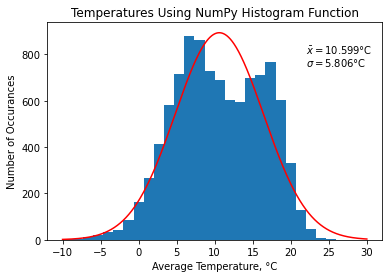

In [44]:
plt.bar(bin_locations_np,bin_height_np,bin_width)       # create a bar graph with the histogram data from NumPy
plt.plot(x_axis, (norm.pdf(x_axis,mean_hist_np,std_hist_np))*13000, "r-")  # plot a normal distribution curve based on the mean and std of the Numpy histogram data
plt.text(22, 800, r'$\bar{x}=$%.3f' u'\xb0C' % (mean_hist_np)) 
plt.text(22, 750, r'$\sigma=$%.3f'u'\xb0C' % (std_hist_np))
plt.title('Temperatures Using NumPy Histogram Function')
plt.ylabel('Number of Occurances')
plt.xlabel('Average Temperature, \xb0C')
plt.savefig("YVR_Ave_Temp_Histo_Numpy.pdf", dpi=150)
plt.show()

TASK 4 - Box-Muller Transformation

TASK 4a

In [80]:
def box_muller_trans (list_u1,list_u2):
    '''This function takes two lists numbers that are uniformly distributed, applies 
    the Box Muller Transformation and returns two lists of normally distributed numbers'''
    
    list_z1 = []
    list_z2 = []
    
    # these loops apply the Box Muller Tansformation to the to lists of numbers
    for num1, num2 in zip(list_u1,list_u2):
        list_z1.append(math.sqrt(-2*math.log(num1))*math.cos(2*math.pi*num2))
    for num1, num2 in zip(list_u1,list_u2):
        list_z2.append(math.sqrt(-2*math.log(num1))*math.sin(2*math.pi*num2))
        
    return list_z1,list_z2   #returns the two lists of normally distributed numbers


TASK 4b

In [81]:
rand_1 = np.random.uniform(0,1,10000) # create a list of random numbers uniformly distributed
rand_2 = np.random.uniform(0,1,10000) # create a list of random numbers uniformly distributed
z1, z2 = box_muller_trans(rand_1, rand_2) # used the Box Muller Tranformation function to 
                                           


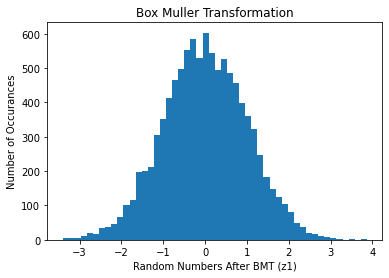

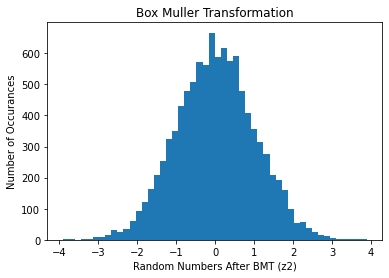

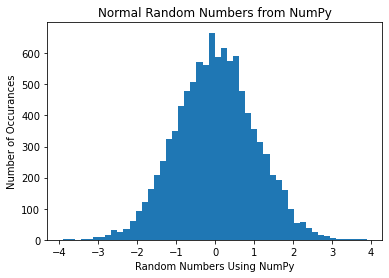

In [91]:
plt.hist(z1, bins=50)      # plot a histogram of normally distributed numbers in z1 that used BMT with 50 bins
plt.title('Box Muller Transformation')
plt.ylabel('Number of Occurances')
plt.xlabel('Random Numbers After BMT (z1)')
plt.show()   

plt.hist(z2, bins=50)      # plot a histogram of normally distributed numbers in z2 that used BMT with 50 bins
plt.title('Box Muller Transformation')
plt.ylabel('Number of Occurances')
plt.xlabel('Random Numbers After BMT (z2)')
plt.show()

norm_dist = np.random.normal(0,1,10000)  # create a list of numbers normally distributed using NumPy

plt.hist(z2, bins=50)      # plot a histogram of normally distributed numbers created by NumPy with 50 bins
plt.title('Box Muller Transformation')
plt.title('Normal Random Numbers from NumPy')
plt.ylabel('Number of Occurances')
plt.xlabel('Random Numbers Using NumPy')
plt.show()


Comparing the histograms of the two BMT number lists z1 and z2, and the histogram of a normally distributed number list created by Numpy, it is easy to see that all three number sets are normally distributed and are very similar. 